# Schedule Problem

Caricamento dati dell'istanza del problema dal file problem_data.xlsx

In [1]:
from utils.data_types import *
from utils.data_helper import *

machines: list[Machine] = get_data_from_excel("machines")
work_types: list[WorkType] = get_data_from_excel("work types")
customer_deadlines: list[CustomerDeadline] = get_data_from_excel("customer deadlines")

#### Creazioni di diverse soluzioni
Il metodo costruttivo è basato nello scegliere la\e lavorazione\i più richiesta e con meno prodotti finita da lavorare sulla macchina più vuota e con più pallets di produzione.

Con le lavorazioni scelte viene creato il job che avrà la dimensione massima possibile in base al tempo rimanente sulla macchina e il numero massimo che può produrre il job delle varie lavorazioni.

La _base_solution_ viene creata con un metodo costruttivo che sceglie più lavorazioni diverse da eseguire in parallelo.

La _solution_with_same_work_ viene creata con un metodo costruttivo che sceglie una lavorazione ed esegue la stessa in parallelo.

In [2]:
from utils.algorithms import *

base_solution = Solution(
    machines,
    work_types,
    customer_deadlines,
)

base_solution.constructive_solution(create_job_with_different_works_in_parallel)

solution_with_same_work = Solution(
    machines,
    work_types,
    customer_deadlines,
)
solution_with_same_work.constructive_solution(create_job_with_same_work_in_parallel)

#### Grafico delle soluzioni costruttive
Una soluzione viene valutata in ordine in base:
- MIN jobs usati (ogni job costa una configurazione)
- MAX tempo rimanente totale (le lavorazioni sono state fatte in modo efficiente, sfruttando le pipeline)
- MAX macchina con il tempo rimanente maggiore (vuol dire che le altre macchine sono state sfruttate bene)

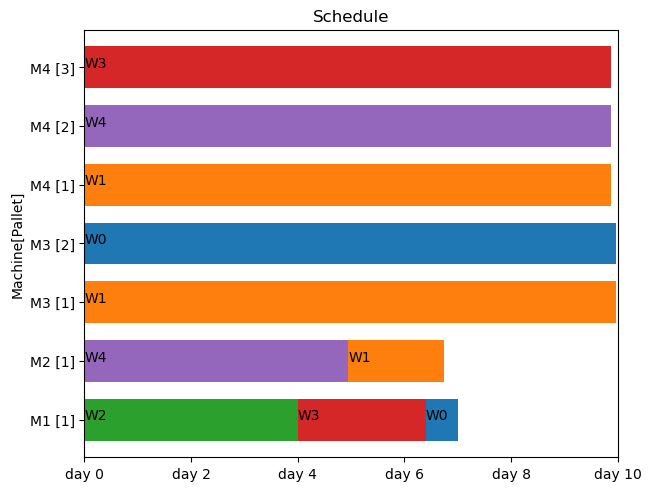

Base solution
status: constructed
jobs used: 7
total remaining time: 3850
max machine remaining time: 1950


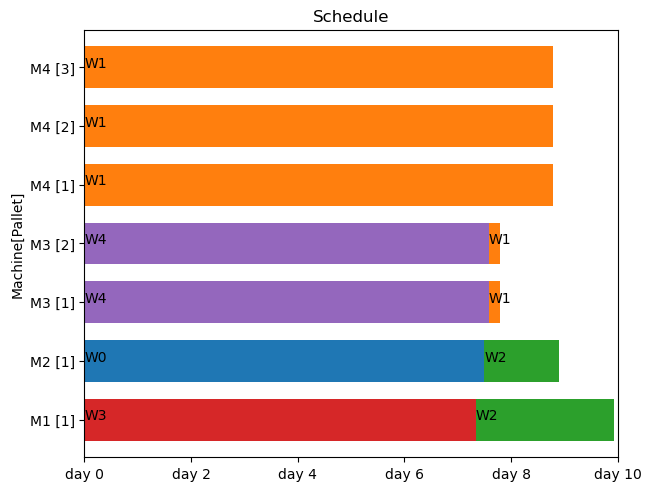

Finish work solution
status: constructed
jobs used: 7
total remaining time: 2750
max machine remaining time: 1320


In [3]:
from utils.plot_helper import draw_gantt_chart


draw_gantt_chart(base_solution, is_label_work_type=True)
print(f"Base solution")
print(f"status: {base_solution.status}")
print(f"jobs used: {base_solution.jobs_used()}")
print(f"total remaining time: {base_solution.total_remaining_time()}")
print(f"max machine remaining time: {base_solution.max_machine_remaining_time()}")

draw_gantt_chart(solution_with_same_work, is_label_work_type=True)
print(f"Finish work solution")
print(f"status: {solution_with_same_work.status}")
print(f"jobs used: {solution_with_same_work.jobs_used()}")
print(f"total remaining time: {solution_with_same_work.total_remaining_time()}")
print(
    f"max machine remaining time: {solution_with_same_work.max_machine_remaining_time()}"
)

#### Local search con insert move
Il neighbor basato su una insert move, sposta il job solo su una macchina con il numero di pallet uguale o superiore rispetto alla macchina madre.

Qui la soluzione risulta migliorata perchè la M1 risulta più vuota

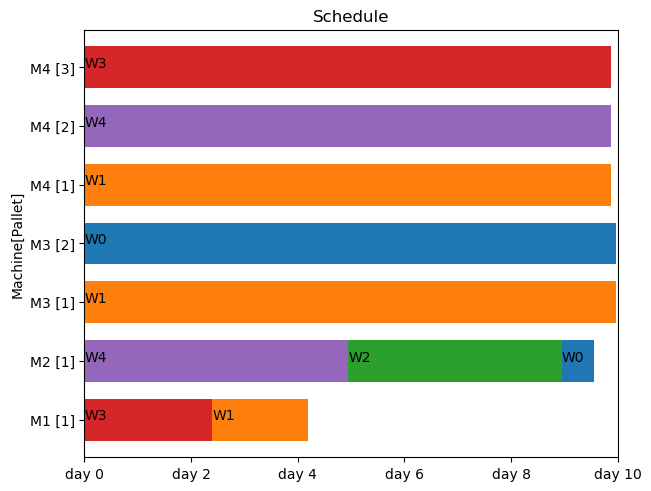

Local search solution
status: constructed
jobs used: 7
total remaining time: 3850
max machine remaining time: 3480


In [4]:
sol_local_search = local_search(base_solution)
sol_local_search.standard_order()
draw_gantt_chart(sol_local_search, is_label_work_type=True)
print(f"Local search solution")
print(f"status: {sol_local_search.status}")
print(f"jobs used: {sol_local_search.jobs_used()}")
print(f"total remaining time: {sol_local_search.total_remaining_time()}")
print(f"max machine remaining time: {sol_local_search.max_machine_remaining_time()}")

### Local search swap move
Il neighbor basato su una swap move, scambia il job solo su una macchina con il numero di pallet uguale rispetto alla macchina madre

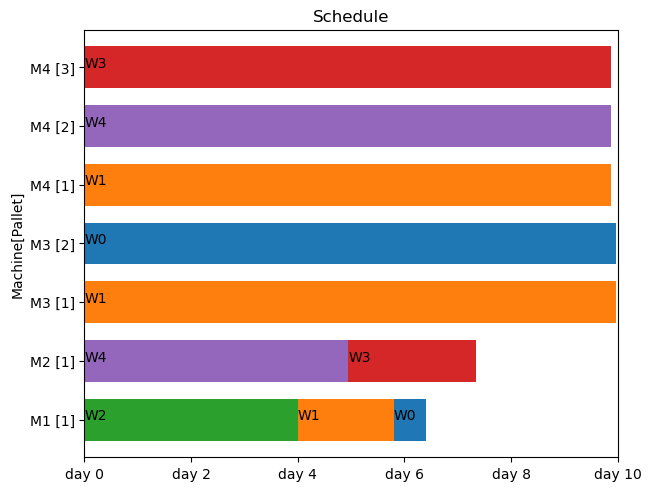

Local search solution
status: constructed
jobs used: 7
total remaining time: 3850
max machine remaining time: 2160


In [5]:
sol_local_search_with_swap_move = local_search(
    base_solution, neighbor_function=swap_move
)
sol_local_search_with_swap_move.standard_order()
draw_gantt_chart(sol_local_search_with_swap_move, is_label_work_type=True)
print(f"Local search solution")
print(f"status: {sol_local_search_with_swap_move.status}")
print(f"jobs used: {sol_local_search_with_swap_move.jobs_used()}")
print(f"total remaining time: {sol_local_search_with_swap_move.total_remaining_time()}")
print(
    f"max machine remaining time: {sol_local_search_with_swap_move.max_machine_remaining_time()}"
)

#### Salvataggio su file excel delle soluzioni

In [6]:
from utils.data_helper import write_solution_to_excel

# print_solution(solution.schedule)
write_solution_to_excel(base_solution.schedule, "Data/schedule_base.xlsx")

# print_solution(solution_from_works.schedule)
write_solution_to_excel(
    solution_with_same_work.schedule, "Data/schedule_with_same_work.xlsx"
)
write_solution_to_excel(
    sol_local_search.schedule, "Data/schedule_with_local_search.xlsx"
)